In [1]:
#import the data reader
from csv import reader

In [2]:
#read data from the data storage
crime_data_lines = sc.textFile('/FileStore/tables/sf_data.csv')
#prepare data 
df_crimes = crime_data_lines.map(lambda line: [x.strip('"') for x in next(reader([line]))])
#get header
header = df_crimes.first()
header

Out[ 94 ]: 
['IncidntNum',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'Location',
 'PdId']

In [3]:
#remove the first line of data
crimes = df_crimes.filter(lambda x: x != header)

In [4]:
#get the first line of data
display(crimes.take(2))

_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13
176184067,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:15,SOUTHERN,NONE,SHIPLEY ST / 4TH ST,-122.40061739890338,37.7815876234701,"(37.7815876234701, -122.40061739890338)",17618406706244
176183906,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,09:45,PARK,NONE,HAYES ST / SCOTT ST,-122.43613031282463,37.775205514978545,"(37.775205514978545, -122.43613031282463)",17618390606244


### how to solove our big data issues
####  approach 1: use RDD 
#### approach 2: use Dataframe, register the RDD to a dataframe
#### approach 3: use SQL

#### We provide 3 options to get distributed data into dataframe and SQL table

#### option 1 to get dataframe and sql

In [8]:

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load("/FileStore/tables/sf_data.csv")
display(df_opt1.take(5))
df_opt1.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
176184067,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:15,SOUTHERN,NONE,SHIPLEY ST / 4TH ST,-122.40061739890338,37.7815876234701,"(37.7815876234701, -122.40061739890338)",17618406706244
176183906,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,09:45,PARK,NONE,HAYES ST / SCOTT ST,-122.43613031282463,37.775205514978545,"(37.775205514978545, -122.43613031282463)",17618390606244
176183423,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,10:50,TARAVAL,NONE,KIRKHAM ST / LA PLAYA ST,-122.50910925205717,37.75841171643452,"(37.75841171643452, -122.50910925205717)",17618342306244
176182776,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:00,RICHMOND,NONE,100 Block of LAKE ST,-122.46095180410846,37.78689526736518,"(37.78689526736518, -122.46095180410846)",17618277606244
176182754,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,07:15,RICHMOND,NONE,POINTLOBOS AV / 48TH AV,-122.50943307434102,37.779849075879056,"(37.779849075879056, -122.50943307434102)",17618275406244


In [9]:
df_opt1[['X','Y']]

Out[ 98 ]: DataFrame[X: string, Y: string]

#### option 2 to get dataframe and sql

In [11]:

from pyspark.sql import Row

def createRow(keys, values):
  assert len(keys) == len(values)
  mapped = dict(zip(keys, values))
  return Row(**mapped)

rdd_rows = crimes.map(lambda x: createRow(header, x))

df_opt2 = spark.createDataFrame(rdd_rows)
df_opt2.createOrReplaceTempView("sf_crime")
display(df_opt2.take(5))

Address,Category,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,PdId,Resolution,Time,X,Y
SHIPLEY ST / 4TH ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176184067,"(37.7815876234701, -122.40061739890338)",SOUTHERN,17618406706244,NONE,18:15,-122.40061739890338,37.7815876234701
HAYES ST / SCOTT ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176183906,"(37.775205514978545, -122.43613031282463)",PARK,17618390606244,NONE,09:45,-122.43613031282463,37.775205514978545
KIRKHAM ST / LA PLAYA ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176183423,"(37.75841171643452, -122.50910925205717)",TARAVAL,17618342306244,NONE,10:50,-122.50910925205717,37.75841171643452
100 Block of LAKE ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176182776,"(37.78689526736518, -122.46095180410846)",RICHMOND,17618277606244,NONE,18:00,-122.46095180410846,37.78689526736518
POINTLOBOS AV / 48TH AV,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176182754,"(37.779849075879056, -122.50943307434102)",RICHMOND,17618275406244,NONE,07:15,-122.50943307434102,37.779849075879056


#### option 3 to get dataframe and sql

In [13]:

df_opt3 = crimes.toDF(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'])
display(df_opt3.take(5))
df_opt3.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
176184067,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:15,SOUTHERN,NONE,SHIPLEY ST / 4TH ST,-122.40061739890338,37.7815876234701,"(37.7815876234701, -122.40061739890338)",17618406706244
176183906,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,09:45,PARK,NONE,HAYES ST / SCOTT ST,-122.43613031282463,37.775205514978545,"(37.775205514978545, -122.43613031282463)",17618390606244
176183423,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,10:50,TARAVAL,NONE,KIRKHAM ST / LA PLAYA ST,-122.50910925205717,37.75841171643452,"(37.75841171643452, -122.50910925205717)",17618342306244
176182776,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:00,RICHMOND,NONE,100 Block of LAKE ST,-122.46095180410846,37.78689526736518,"(37.78689526736518, -122.46095180410846)",17618277606244
176182754,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,07:15,RICHMOND,NONE,POINTLOBOS AV / 48TH AV,-122.50943307434102,37.779849075879056,"(37.779849075879056, -122.50943307434102)",17618275406244


##Write a Spark program that counts the number of crimes for different category.

In [15]:
#rdd based
catorgory_set_rdd = crimes.map(lambda item: (item[1],1))
from operator import add
result = sorted(catorgory_set_rdd.reduceByKey(add).collect(), key = lambda item: -item[1])
display(result)

_1,_2
LARCENY/THEFT,2805
OTHER OFFENSES,1002
NON-CRIMINAL,991
ASSAULT,780
VANDALISM,650
VEHICLE THEFT,353
WARRANTS,312
SUSPICIOUS OCC,312
BURGLARY,302
MISSING PERSON,265


In [16]:
#dataframe based
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q1_result)

category,count
LARCENY/THEFT,2805
OTHER OFFENSES,1002
NON-CRIMINAL,991
ASSAULT,780
VANDALISM,650
VEHICLE THEFT,353
SUSPICIOUS OCC,312
WARRANTS,312
BURGLARY,302
MISSING PERSON,265


In [17]:
#Spark SQL based
crimeCategory = spark.sql("SELECT category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(crimeCategory)

category,Count
LARCENY/THEFT,2805
OTHER OFFENSES,1002
NON-CRIMINAL,991
ASSAULT,780
VANDALISM,650
VEHICLE THEFT,353
SUSPICIOUS OCC,312
WARRANTS,312
BURGLARY,302
MISSING PERSON,265


## Write a program that counts the number of crimes for different district

In [19]:
#Spark SQL based
crimeDistrict = spark.sql("SELECT PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY PdDistrict ORDER BY Count DESC")
display(crimeDistrict)

PdDistrict,Count
SOUTHERN,1745
MISSION,1191
NORTHERN,1173
CENTRAL,1137
BAYVIEW,817
INGLESIDE,670
TARAVAL,662
TENDERLOIN,536
RICHMOND,527
PARK,519


## Write a program to count the number of crimes each Sunday at SF downtown.

In [21]:
#Spark SQL based
crimeSunday = spark.sql("SELECT Date, DayOfWeek, count(*) as Count\
                      FROM sf_crime\
                      where DayOfWeek='Sunday' and \
                      pow(Y - 37.792489, 2) + pow(X+ 122.403221, 2) < pow(0.005, 2) \
                      group by Date,DayOfWeek \
                      order by Date")
display(crimeSunday)

Date,DayOfWeek,Count
07/16/2017,Sunday,10
07/23/2017,Sunday,20
07/30/2017,Sunday,14


##visualize the spatial distribution of crimes and run a kmeans clustering algorithm (please use Spark ML kmeans)

In [23]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
pdf = df_opt2[['Y','X']].toPandas()
pdf=pdf.astype(float)
pdf

Out[ 107 ]: 
 Y X
0 37.781588 -122.400617
1 37.775206 -122.436130
2 37.758412 -122.509109
3 37.786895 -122.460952
4 37.779849 -122.509433
5 37.773053 -122.453481
6 37.772541 -122.466205
7 37.753715 -122.466733
8 37.743143 -122.473554
9 37.775421 -122.403405
10 37.764731 -122.493328
11 37.754943 -122.473371
12 37.730883 -122.426146
13 37.784828 -122.403971
14 37.728396 -122.459182
15 37.806112 -122.417756
16 37.784801 -122.420375
17 37.779566 -122.398063
18 37.778719 -122.414744
19 37.789573 -122.388486
20 37.789760 -122.400923
21 37.807020 -122.418111
22 37.791628 -122.412463
23 37.776370 -122.419508
24 37.785373 -122.431370
25 37.775421 -122.403405
26 37.780008 -122.397404
27 37.769177 -122.391094
28 37.790053 -122.400195
29 37.800781 -122.398862
... ... ...
8947 37.756486 -122.406539
8948 37.777281 -122.434866
8949 37.781527 -122.455927
8950 37.726227 -122.441942
8951 37.785063 -122.406521
8952 37.785063 -122.406521
8953 37.800479 -122.431978
8954 37.774095 -122.420001
8955 37.774095 -122.420001
8956 37.780639 -122.438098
8957 37.780639 -122.438098
8958 37.800188 -122.441178
8959 37.800188 -122.441178
8960 37.800188 -122.441178
8961 37.776370 -122.419508
8962 37.786517 -122.419017
8963 37.780057 -122.408674
8964 37.780057 -122.408674
8965 37.780057 -122.408674
8966 37.775417 -122.434485
8967 37.788808 -122.411889
8968 37.778294 -122.415449
8969 37.778294 -122.415449
8970 37.778294 -122.415449
8971 37.764960 -122.466444
8972 37.784828 -122.403971
8973 37.784828 -122.403971
8974 37.773455 -122.413532
8975 37.784568 -122.431207
8976 37.778469 -122.513642

[8977 rows x 2 columns]

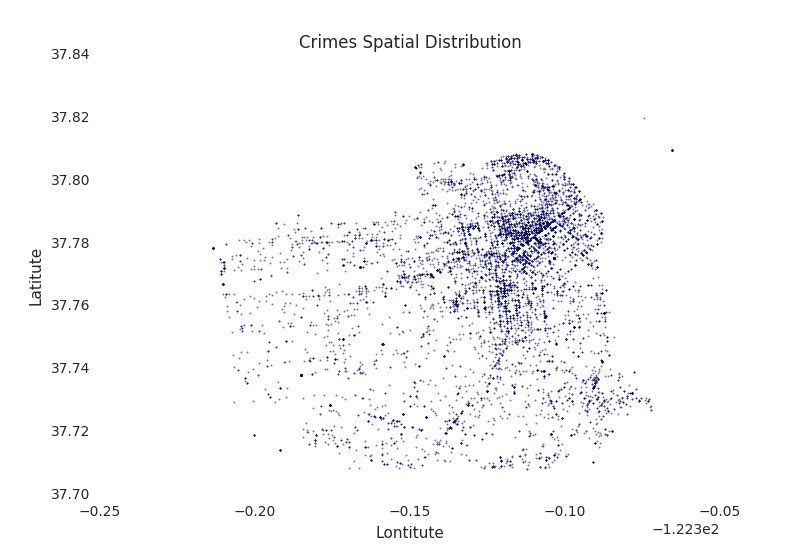

In [25]:
aw=pdf.plot(kind='scatter', x='X', y='Y',title='Crimes Spatial Distribution',c='blue',alpha=0.5,s=1)
aw.set_xlabel('Lontitute')
aw.set_ylabel('Latitute')
display(plt.show())


####cast longitutue and latitute to float, and prepare feature dataset to train Kmeans

In [27]:
df_opt2 = df_opt2.withColumn('X', df_opt2['X'].cast('float')).withColumn('Y', df_opt2['Y'].cast('float'))
vecAssembler = VectorAssembler(inputCols=["X", "Y"], outputCol="features")
new_df = vecAssembler.transform(df_opt2)[['features']]

####train the model and visulize the result

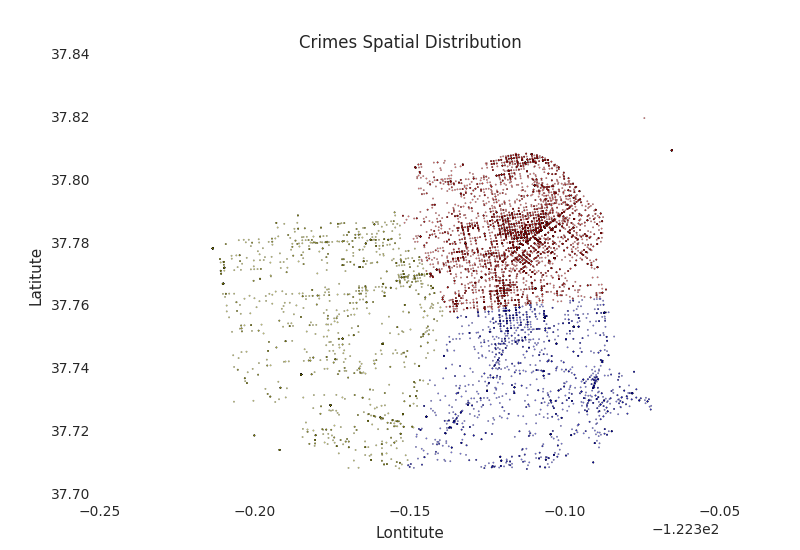

In [29]:
kmeans = KMeans().setK(3)
model = kmeans.fit(new_df)
centers = model.clusterCenters()
long_centers = [i for i, _ in centers]
lat_centers = [i for _, i in centers]
transformed = model.transform(new_df)
memberships = transformed.toPandas().loc[:,'prediction'].values
clusters2colors = {0: 'r', 1: 'y', 2: 'b'}
colors = [clusters2colors[i] for i in memberships]

#plot the spatial Distribution
aw=pdf.plot(kind='scatter', x='X', y='Y',title='Crimes Spatial Distribution',c=colors,alpha=0.5,s=1)
aw.set_xlabel('Lontitute')
aw.set_ylabel('Latitute')
display(plt.show())